In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("../text_gcn_graph_comparison.csv")
df

,Unnamed: 0,seed,unlabeled_amount,labeled_amount,acc,test_name,graph_method
0,0,0,1000,400,0.875,their implementation (NO SELF LOOPS),"{'name': 'text_gcn_impl', 'kwargs': {'window_s..."
1,1,0,1000,400,0.871,my implementation,"{'name': 'pmi_tfidf', 'kwargs': {'window_size'..."
2,2,1,1000,400,0.894,their implementation (NO SELF LOOPS),"{'name': 'text_gcn_impl', 'kwargs': {'window_s..."
3,3,1,1000,400,0.895,my implementation,"{'name': 'pmi_tfidf', 'kwargs': {'window_size'..."
4,4,2,1000,400,0.873,their implementation (NO SELF LOOPS),"{'name': 'text_gcn_impl', 'kwargs': {'window_s..."
5,5,2,1000,400,0.882,my implementation,"{'name': 'pmi_tfidf', 'kwargs': {'window_size'..."
6,6,3,1000,400,0.879,their implementation (NO SELF LOOPS),"{'name': 'text_gcn_impl', 'kwargs': {'window_s..."
7,7,3,1000,400,0.885,my implementation,"{'name': 'pmi_tfidf', 'kwargs': {'window_size'..."
8,8,4,1000,400,0.861,their implementation (NO SELF LOOPS),"{'name': 'text_gcn_impl', 'kwargs': {'window_s..."
9,9,4,1000,400,0.857,my implementation,"{'name': 'pmi_tfidf', 'kwargs': {'window_size'..."


In [17]:
# second_df = pd.read_csv("../reuters_lowresource_moregcns.csv")
# df = pd.concat([df, second_df], axis=0)

In [18]:
from matplotlib import cm
model_count = len(df["test_name"].unique())
cmap = cm.get_cmap('rainbow')
color_mapping = {model : cmap(i/model_count) for i, model in enumerate(df["test_name"].unique())}

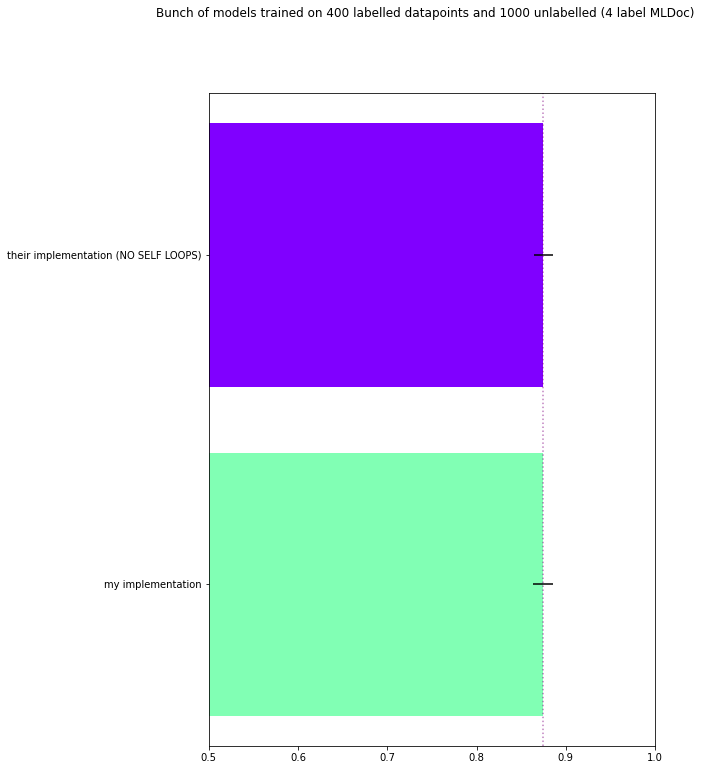

In [19]:
fig, ax = plt.subplots(1, figsize=(8, 12))

fig.suptitle("Bunch of models trained on 400 labelled datapoints and 1000 unlabelled (4 label MLDoc)")

names = []
means = []
for j, (name, j_df) in enumerate(df.groupby("test_name")):
    mean = j_df["acc"].mean()
    std = j_df["acc"].std()
    ax.barh(y=j, width=mean, xerr=std, color=color_mapping[name])
    names.append(name)

    means.append(mean)

ax.set_yticks(range(len(names)))
ax.set_yticklabels(names)
ax.set_xlim((0.5, 1))

line_color = "gold" if ductive == "in" else "purple"
ax.axvline(max(means), linestyle=":", alpha=0.5, color=line_color)